In [ ]:
#hide
import sys
sys.path.append("..")

# Perceptual Control Theory

> A python library for creating perceptual control hierarchies.

With this library you can create and run simple or complex hierarchies of perceptual control systems as well as make use of the power of the Python platform and its rich set of packages.

In the context of this library a single control system comprising a perceptual, reference, comparator and output function is called a Node. The functions therein can be configured by the user.

A hierarchy is defined by a collection of nodes.

## Install

`pip install pct`

## Import

Examples of importing the library functionality.

`import pct as p`

`from pct.hierarchy import Hierarchy`

`from pct import *`

## How to use

Import modules from the PCT library.

In [ ]:
from pct.nodes import PCTNode

For the purposes of this example define a world model. This would not be required if the real world is used, or a simulation such as OpenAI Gym.

In [ ]:
def velocity_model(velocity,  force , mass):
    velocity = velocity + force / mass
    return velocity

# World value
mass = 50

Create a PCTNode, a control system unit comprising a reference, perception, comparator and output function. The default value for the reference is 1. With the history flag set, the data for each iteration is recorded for later plotting. 

In [ ]:
pctnode = PCTNode(history=True)

Call the node repeatedly to control the perception of velocity. With the verbose flag set, the control values are printed. In this case the printed values are the iteration number, the (velocity) reference, the perception, the error and the (force) output.

In [ ]:
for i in range(40):
    print(i, end=" ")
    force = pctnode(verbose=True)
    velocity = velocity_model(pctnode.get_perception_value(), force, mass)
    pctnode.set_perception_value(velocity)

0 1.000 0.000 1.000 10.000 
1 1.000 0.200 0.800 8.000 
2 1.000 0.360 0.640 6.400 
3 1.000 0.488 0.512 5.120 
4 1.000 0.590 0.410 4.096 
5 1.000 0.672 0.328 3.277 
6 1.000 0.738 0.262 2.621 
7 1.000 0.790 0.210 2.097 
8 1.000 0.832 0.168 1.678 
9 1.000 0.866 0.134 1.342 
10 1.000 0.893 0.107 1.074 
11 1.000 0.914 0.086 0.859 
12 1.000 0.931 0.069 0.687 
13 1.000 0.945 0.055 0.550 
14 1.000 0.956 0.044 0.440 
15 1.000 0.965 0.035 0.352 
16 1.000 0.972 0.028 0.281 
17 1.000 0.977 0.023 0.225 
18 1.000 0.982 0.018 0.180 
19 1.000 0.986 0.014 0.144 
20 1.000 0.988 0.012 0.115 
21 1.000 0.991 0.009 0.092 
22 1.000 0.993 0.007 0.074 
23 1.000 0.994 0.006 0.059 
24 1.000 0.995 0.005 0.047 
25 1.000 0.996 0.004 0.038 
26 1.000 0.997 0.003 0.030 
27 1.000 0.998 0.002 0.024 
28 1.000 0.998 0.002 0.019 
29 1.000 0.998 0.002 0.015 
30 1.000 0.999 0.001 0.012 
31 1.000 0.999 0.001 0.010 
32 1.000 0.999 0.001 0.008 
33 1.000 0.999 0.001 0.006 
34 1.000 0.999 0.001 0.005 
35 1.000 1.000 0.000 0.004 
3

Using the plotly library plot the data. The graph shows the perception being controlled to match the reference value.

```python
import plotly.graph_objects as go
fig = go.Figure(layout_title_text="Velocity Goal")
fig.add_trace(go.Scatter(y=pctnode.history.data['refcoll']['constant'], name="ref"))
fig.add_trace(go.Scatter(y=pctnode.history.data['percoll']['variable'], name="perc"))
```

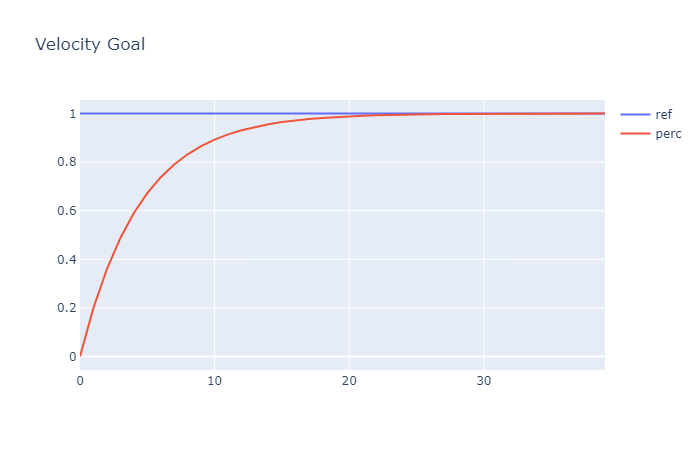

In [ ]:
# This code is only for the purposes of displaying image of the graph generated by the above code.
from IPython.display import Image
Image(filename='pct_node_plot.png') 

This shows a very basic example of the use of the PCT library. For more advanced functionality see the API documentation at https://perceptualrobots.github.io/pct/.